# **Лабораторная работа №1**

# **Статистическое моделирование случайных величин. Точечное оценивание параметров распределения и функций распределения случайных величин.**

## **Вариант 8**

In [718]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sb

from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import logistic
from statsmodels.stats.descriptivestats import Description

## Часть 1 
## 1. Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,sigma^2)

In [719]:
n = 70
mu, du = 0, 4

In [720]:
s = np.random.normal(mu, math.sqrt(du), n)
a_estimate = np.mean(s)
sigma_estimate = np.std(s, ddof=1)
(a_estimate, sigma_estimate)

print(np.sort(s))
print("\n")
print(f"estimate = ", a_estimate)

[-4.94006069 -3.89679993 -3.83339403 -3.2719622  -2.75342946 -2.120521
 -2.10647053 -2.03775545 -1.99806597 -1.73673278 -1.70690699 -1.68675415
 -1.64285295 -1.48124715 -1.19893895 -1.1412796  -1.11153008 -0.94584714
 -0.73101935 -0.67504156 -0.49990535 -0.47382141 -0.42735451 -0.40871895
 -0.2943627  -0.22706052 -0.19166646 -0.03643681 -0.02546945  0.04013571
  0.06101961  0.23437927  0.31514896  0.4117184   0.49500827  0.51477387
  0.54439729  0.56192552  0.69719477  0.76389703  0.84544723  0.97713217
  1.01166396  1.01410262  1.01831834  1.18029819  1.18032522  1.18182849
  1.20129721  1.33103266  1.33899812  1.42704808  1.44313579  1.44651194
  1.5382523   1.58017178  1.70313542  1.7247689   1.83224048  1.9535135
  2.01743184  2.06453468  2.31022831  2.90547696  3.10951257  3.18580652
  3.34024813  3.48786394  3.91831846  3.99042574]


estimate =  0.2613894588065537


## 1.1 Правило Дэвида Скотта

In [721]:
h = (math.sqrt(du) * 3.5) / (np.cbrt(n))
print(f"h = ", h)

min_data = np.min(s)
max_data = np.max(s)
bins = np.arange(min_data, max_data+h, h) 
k_bins = round(abs(min_data - max_data)/h)
print(bins)
print(k_bins)

h =  1.6984992522418105
[-4.94006069 -3.24156143 -1.54306218  0.15543707  1.85393632  3.55243557
  5.25093483]
5


## (2.2) Вычисление суммы абсолютных частот. Построение гистограммы абсолютных частот. Построение графика теоритической частоты распределения СВ Х

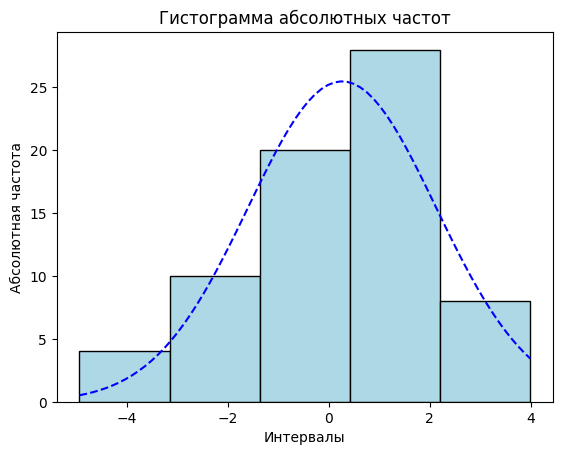

[ 3  2  8  8 17 20  5  7]
[-4.94006069 -3.82374988 -2.70743908 -1.59112828 -0.47481747  0.64149333
  1.75780413  2.87411493  3.99042574]
Сумма абсолютных частот: 70


In [722]:
counts, bin_ed = np.histogram(s, bins='fd')

total_frequency = np.sum(counts) 
plt.hist(s, bins=k_bins, edgecolor='black', color="lightblue")
x = np.linspace(min_data, max_data, 70)
mean = np.mean(s) 
std = np.std(s)  
pdf = norm.pdf(x, mean, std)
theoretical_frequency = pdf * (n * (bins[1] - bins[0]))
cdf = norm.cdf(x, mu, math.sqrt(du))
plt.plot(x, theoretical_frequency, "--", color="blue")
plt.xlabel('Интервалы')
plt.ylabel('Абсолютная частота')
plt.title('Гистограмма абсолютных частот')  
plt.show()

print(counts)
print(bin_ed)
print(f"Сумма абсолютных частот: {total_frequency}")

## 1.2(2.1) Вычисление суммы относительных частот. Построение гистограммы относительных частот. Построение графика теоритической кривой распределения СВ Х

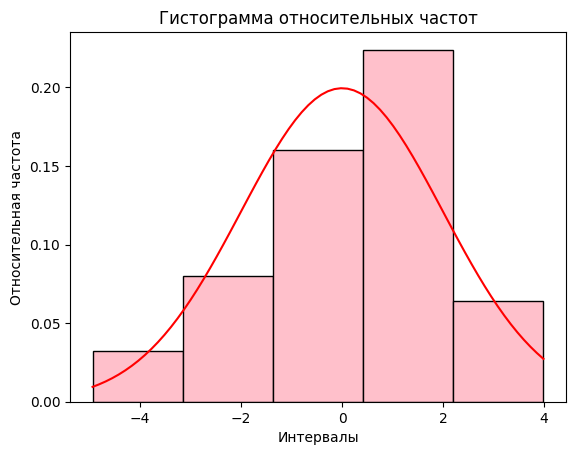

[0.03199314 0.07998285 0.15996569 0.22395197 0.06398628]
[-4.94006069 -3.1539634  -1.36786612  0.41823117  2.20432845  3.99042574]
0.9509556207379484


In [723]:
count, bin_ed = np.histogram(s, k_bins, density=True)
plt.hist(s, bins=k_bins, edgecolor='black', color="pink", density=True)
x = np.linspace(min_data, max_data, 70)
pdf = norm.pdf(x, mu, math.sqrt(du))
plt.plot(x, pdf, color="red")
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот')  
plt.show()

relative_frequencies = np.sum(count*h)
total_relative_frequency = np.sum(relative_frequencies)
print(count)
print(bin_ed)
print(total_relative_frequency)


## 2.3 Построение кумуляты относительных частот и графика теоритической функции распределения 

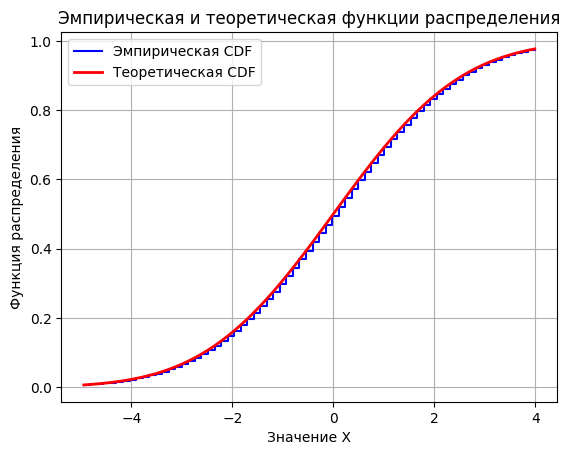

In [724]:
y = norm.cdf(x, mu, math.sqrt(du)) 
# plt.plot(x, y, color="purple") 
plt.step(x, y, where='post', label='Эмпирическая CDF', color='blue')
plt.plot(x, cdf, label='Теоретическая CDF', color='red', linewidth=2)
plt.xlabel('Значение X')
plt.ylabel('Функция распределения')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.legend()
plt.grid(True)

plt.show()

## 2.4 Построение по выборке бокс-плота распределения 

Axes(0.125,0.11;0.775x0.77)


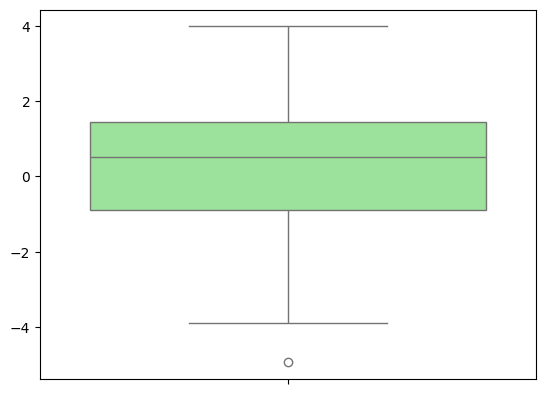

In [725]:
W=sb.boxplot(s, color="lightgreen") 
print(W)

## 3.1 Нахождение вероятности P(|X - M(X)| < q * sigma(X))

In [726]:
lower_b = mu - 0.5 * math.sqrt(du)
upper_b = mu + 0.5 * math.sqrt(du)

probability = norm.cdf(upper_b, loc=mu, scale=math.sqrt(du)) - norm.cdf(lower_b, loc=mu, scale=math.sqrt(du))

# print(format(probability, ".3f"))
print(f'Вероятность P(|X - M(X)| < q * sigma(X)) = {probability}')

Вероятность P(|X - M(X)| < q * sigma(X)) = 0.38292492254802624


## 3.2 Нахождение относительной частоты события {|X - M(X)| < q * sigma(X)}

In [727]:
count_event = np.sum((s < upper_b) & (s > lower_b))
print(count_event)

r_frequency = count_event / n
print(f'Относительная частота события |X - M(X)| < q * sigma(X): {r_frequency}')

25
Относительная частота события |X - M(X)| < q * sigma(X): 0.35714285714285715


## 3.3 Увеличили объем выборки в 50 раз, повторили п. 3.2

In [728]:
N = 3500
S = np.random.normal(mu, math.sqrt(du), N)
C = np.sum((S < upper_b) & (S > lower_b))
print(C)

R = C / N
print(R)

1365
0.39


## 4.2 Вычисление по выборке точечных оценок параметров распределения СВ Х

In [729]:
mean_f = np.sum(s) / n
var_f = np.sum((s - mean_f) ** 2) / n
var = np.var(s)
std_f = math.sqrt(var_f)
m = np.median(s)
p = np.sort(s)
med_f = (p[n // 2 - 1] + p[n // 2]) / 2
as_f = np.sum((s - mean_f) ** 3) / (n * std_f**3)
a1 = skew(s, axis=0, bias=True)
ex_f = np.sum((s - mean_f) **4) / (n * std_f**4) - 3
ex = kurtosis(s)

print(med_f)
print(m)
print(mean_f)
print(mean)
print(var_f)
print(var)
print(std_f)
print(sigma_estimate)
print(as_f)
print(a1)
print(ex_f)
print(ex)



0.5048910693930726
0.5048910693930726
0.2613894588065537
0.2613894588065537
3.464551090415033
3.464551090415033
1.8613304624421299
1.8747698460833444
-0.3776850797208793
-0.3776850797208791
0.08332798638085492
0.08332798638085537


## 4.3 Увеличили объем выборки в 50 раз, повторили п. 4.2

In [730]:
Mean_f = np.sum(S) / N
Mean = np.mean(S)
Var_f = np.sum((S - Mean_f) ** 2) / N
Var = np.var(S)
Std_f = math.sqrt(Var_f)
M = np.median(S)
P = np.sort(S) 
Med_f = (P[N // 2 - 1] + P[N // 2]) / 2
As_f = np.sum((S - Mean_f) ** 3) / (N * Std_f**3)
A = skew(S, axis=0, bias=True)
Ex_f = np.sum((S - Mean_f) **4) / (N * Std_f**4) - 3
Ex = kurtosis(S)
 
print(Med_f)
print(M)
print(Mean_f)
print(Mean)
print(Var_f)
print(Var)
print(Std_f)
print(sigma_estimate)
print(As_f)
print(A)
print(Ex_f)
print(Ex)

0.025514609851175298
0.025514609851175298
0.007813516400436201
0.007813516400436201
3.92892520884158
3.92892520884158
1.9821516614128143
1.8747698460833444
-0.0317269996611091
-0.0317269996611091
0.0988286983273432
0.09882869832734364


## Часть 2
## 1. Смоделировать выборку из п независимых наблюдений над случайной величиной Y, имеющей логистический закон распределения

In [731]:
a = 0
b = 1
s1 = np.random.logistic(a, b, n)
print(s1)

h1 = (b * 3.5) / (np.cbrt(n))
print(f"h = ", h1)

min_data1 = np.min(s1)
max_data1 = np.max(s1)
bins1 = np.arange(min_data1, max_data1 + h1, h1) 
k_bins1 = round(abs(min_data1-max_data1)/h1)
print(k_bins1)
print(bins1)

[-0.09591452 -0.6665079   1.09754679  2.94733841 -1.01386436  0.39793134
 -0.43669708 -0.57983054 -0.32510025 -0.87817311  0.74717125  0.38756729
  2.73856709  0.43503724 -0.99455292  1.07252507  3.63204576 -0.18006493
  1.17345556  1.41897687 -0.39844289  4.89882184 -2.40686752 -1.2520994
  1.050204    1.24515013 -3.26492665  2.0833584   0.29401024  0.28137355
 -0.07037706  2.03914379  0.66454255 -1.13130044 -0.52133587 -3.22907046
  0.14275147  1.37211968  0.13444774  0.17057754 -2.85672893  0.24004453
 -0.39518076  0.5669707   1.05504424  0.05726691  0.29856768  0.10363751
  0.07619531  4.00815356  0.55737254 -0.01274145  0.69677799  0.44961095
 -0.69550629 -1.73035248  3.06111961 -3.21397054 -2.10148985  0.51509328
 -0.82745198 -0.26997442  1.07420564 -1.31249418 -1.71044841 -1.11254668
 -0.5976892  -0.24779826 -1.83634712  2.04990873]
h =  0.8492496261209053
10
[-3.26492665 -2.41567703 -1.5664274  -0.71717777  0.13207185  0.98132148
  1.8305711   2.67982073  3.52907036  4.37831998

## 2. Построение гистограммы относительных частот и теоретической кривой распределения СВ Y

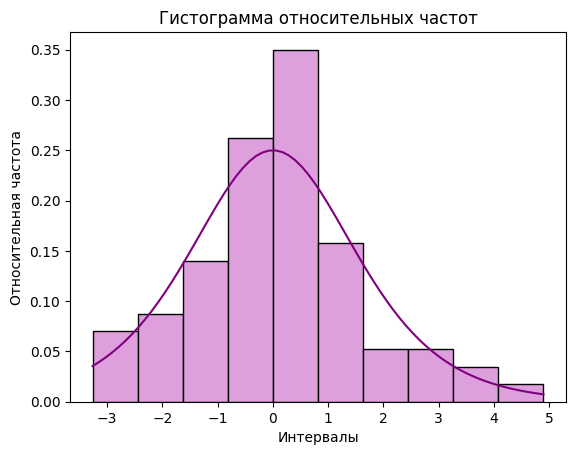

0.9999999999999999


In [732]:
counts1, bin_e = np.histogram(s1, k_bins1)
y = np.linspace(min_data1, max_data1, n)
plt.hist(s1, bins=k_bins1, edgecolor="black", color="plum", density=True)
pdf = logistic.pdf(y, a, b)
plt.plot(y, pdf, color="purple")
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот')
plt.show()

rf = counts1 / n
trf = np.sum(rf)
print(trf)

## 3. Построение по выборке бокс-плота распределения СВ Y

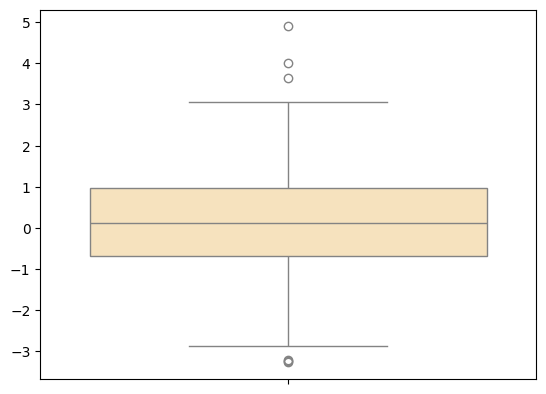

In [733]:
w = sb.boxplot(s1, color="moccasin")

## 4.1 Нахождение вероятности P(|Y - M(Y)| < q * s(Y))

In [734]:
lower = a - 0.5 * b
upper = a + 0.5 * b
probab = logistic.cdf(upper, loc=a, scale=b) - logistic.cdf(lower, loc=a, scale=b)

print(f'Вероятность P(|Y - M(Y)| < q * s(Y)) = {probab}')

Вероятность P(|Y - M(Y)| < q * s(Y)) = 0.2449186624037092


## 4.2 Нахождение относительной частоты события {|Y - M(Y)| < q * s(Y)}

In [735]:
count_event2 = np.sum((s1 < upper) & (s1 > lower))
print(count_event2)

r_f = count_event2 / n
print(r_f)

24
0.34285714285714286


## 4.3 Увеличили объем выборки в 50 раз, повторили п. 4.2

In [736]:
s2 = np.random.logistic(a, b, N)
c2 = np.sum((s2 < upper) & (s2 > lower))
print(c2)

rf_ = c2 / N
print(rf_)

852
0.24342857142857144


## 5. Вычисление по выборке точечных оценок параметров распределения СВ Y

In [737]:
result = Description(
    s1,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=0.05,
    use_t=True)
display(result.summary())
print(np.var(s1)) 

nobs,70.0
missing,0.0
mean,0.12669694743253515
std_err,0.19168280946501207
upper_ci,0.5090936892386962
lower_ci,-0.255699794373626
std,1.6037334445312315
iqr,1.6627025033694527
mad,1.1589468537777812
coef_var,12.658027498138448
range,8.16374849588961


2.5352186616636083


## Увеличили объем выборки в 50 раз, повторили п. 5 

In [738]:
result1 = Description(
    s2,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=0.05,
    use_t=True)
display(result1.summary())
print(np.var(s2)) 

nobs,3500.0
missing,0.0
mean,-0.008837086187176045
std_err,0.03107027980776178
upper_ci,0.0520806155892952
lower_ci,-0.06975478796364729
std,1.8381425422594768
iqr,2.2367755937377884
mad,1.401739128247631
coef_var,-208.003238095256
range,17.48130602468091


3.3778026433768
